<a href="https://colab.research.google.com/github/frdn20/Portfolio_Data/blob/main/Project_Data_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike Sharing Dataset]

- **DATASET** : [https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset]

## Menentukan Pertanyaan Bisnis

- Apakah ada pola musiman dalam penyewaan sepeda?
- Apakah terdapat tren peningkatan atau penurunan penyewaan dari tahun 2011 ke 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("/content/drive/MyDrive/Dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("/content/drive/MyDrive/Dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- **day_df (day.csv):**

Kolom penting meliputi:
season (musim), yr (tahun), mnth (bulan), weekday (hari dalam minggu), workingday (hari kerja atau tidak).
Variabel cuaca seperti temp (suhu), atemp (suhu terasa), hum (kelembaban), dan windspeed (kecepatan angin).
casual, registered, dan cnt (jumlah total penyewaan).

- **hour_df (hour.csv):**

Memiliki informasi tambahan, seperti jam (hr), sementara struktur lain mirip dengan data day_df (day.csv)

### Assessing Data

**Assessing day_df**

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Assessing hour_df**

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [12]:
hour_df.isnull().values.any()


False

**Insight:**

**Semua deskripsi, pengertian, parameter data dapat dilihat pada readme.txt**

1.   Dataset day_df (day.csv)
- Rata-rata kondisi cuaca: 1.39 (mendekati kategori "Clear/Few clouds").
- Suhu rata-rata: 0.495 (normalisasi terhadap 41°C, berarti sekitar 20.3°C).
- Tingkat kelembapan rata-rata: 0.627 (sekitar 62.7%).
- Kecepatan angin rata-rata: 0.19 (normalisasi terhadap 67, berarti sekitar 12.7 km/jam).
- Rata-rata penyewaan: 4504 per hari.
- Penyewaan casual: 848 (19% dari total rata-rata).
- Penyewaan registered: 3656 (81% dari total rata-rata).
2.   Dataset hour_df (hour.csv):
- Rentang jam (hr): 0–23, dengan rata-rata 11.55 (mendekati tengah hari).
- Pola cuaca serupa dengan dataset harian.
- Rata-rata penyewaan per jam: 189.
- Rata-rata casual: 36, dan registered: 154.

**Untuk Kedua Dataset :**
- Tidak ada missing value
- Tidak ada data duplikat
- Terdapat masalah bahwa pada kedua dataset memiliki sebuah kolom bertipe data `object` yaitu `dteday` . Untuk itu dilakukan konversi tipe data dari `object` menjadi `datetime` melalui proses cleaning data.

### Cleaning Data

In [13]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [14]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Kolom `dteday` di kedua dataset telah diubah menjadi tipe `datetime`

## Exploratory Data Analysis (EDA)

### Explore ...

##**Eksplorasi Data day_df**

In [15]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Distribusi Kolom Season**

In [16]:
day_df['season'].value_counts()

,count
season,
3,188
2,184
1,181
4,178


**Rata-rata Penyewaan Berdasarkan Bulan**

In [17]:
day_df.groupby('mnth')['cnt'].mean()


,cnt
mnth,
1,2176.338710
2,2655.298246
3,3692.258065
4,4484.900000
5,5349.774194
6,5772.366667
7,5563.677419
8,5664.419355
9,5766.516667


**Rata-Rata Jumlah Penyewaan Berdasarkan Musim**

In [18]:
day_df.groupby('season')['cnt'].mean()

,cnt
season,
1,2604.132597
2,4992.331522
3,5644.303191
4,4728.162921


In [19]:
day_df.corr()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494


**Rata-Rata Penyewaan Berdasarkan Working Day**

In [20]:
day_df.groupby('workingday')['cnt'].mean()

,cnt
workingday,
0,4330.168831
1,4584.820000


**Insight:**


**1. Distribusi Kolom Season:**
- Jumlah baris data untuk masing-masing musim:
Fall (3) memiliki data terbanyak (188 hari).
Winter (4) memiliki data paling sedikit (178 hari).
-Dataset ini relatif seimbang dalam hal distribusi data di seluruh musim, jadi tidak ada bias signifikan yang disebabkan oleh jumlah data di setiap musim.

**2. Rata-Rata Jumlah Penyewaan Berdasarkan Bulan:**
- Bulan dengan rata-rata penyewaan tertinggi: September (5766.52).
- Bulan dengan rata-rata penyewaan terendah: Januari (2176.34)
- Penyewaan sepeda sangat tinggi selama bulan-bulan musim panas (Mei hingga September), menunjukkan hubungan positif antara musim panas dan aktivitas bersepeda.
- Penyewaan sepeda cenderung rendah selama bulan musim dingin (Desember hingga Februari), kemungkinan karena cuaca yang kurang mendukung.

**3. Rata-Rata Jumlah Penyewaan Berdasarkan Musim:**
- Musim Fall (3) memiliki rata-rata penyewaan tertinggi, diikuti oleh Summer (2).
Musim Spring (1) memiliki rata-rata penyewaan terendah.
Musim Winter (4) ternyata tidak menjadi musim dengan penyewaan terendah, meskipun jumlahnya menurun dibandingkan Fall atau Summer
- Musim Winter dan Spring memerlukan strategi promosi penyewaan sepeda karena aktivitas bersepeda cenderung rendah.

**4. Penyewaan Berdasarkan Working Day:**
-  Penyewaan rata-rata pada hari kerja (workingday = 1) sedikit lebih tinggi dibandingkan hari libur atau akhir pekan (workingday = 0)






##**Ekpslorasi data hour_df**

In [21]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Rata-Rata Penyewaan Sepeda Per Jam**

In [22]:
hour_df.groupby('hr')['cnt'].mean()

,cnt
hr,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004


**Pola Harian dan Jam Berdasarkan Working Day**

In [23]:
hour_df.groupby(['workingday', 'hr'])['cnt'].mean()

workingday  hr
0           0      90.800000
            1      69.508696
            2      53.171053
            3      25.775330
            4       8.264317
            5       8.689189
            6      18.742358
            7      43.406926
            8     105.653680
            9     171.623377
            10    255.909091
            11    315.316017
            12    366.259740
            13    372.731602
            14    364.645022
            15    358.813853
            16    352.727273
            17    323.549784
            18    281.056522
            19    231.673913
            20    174.739130
            21    142.060870
            22    116.060870
            23     85.930435
1           0      36.786290
            1      16.552632
            2       8.683778
            3       4.942553
            4       5.429787
            5      24.913131
            6     102.500000
            7     290.612903
            8     477.006048
            9     241.518145
            10    135.366935
            11    158.229839
            12    200.820926
            13    198.429719
            14    183.572289
            15    201.331325
            16    293.122244
            17    525.290581
            18    492.226908
            19    348.401606
            20    249.718876
            21    186.287149
            22    138.389558
            23     88.708835
Name: cnt, dtype: float64

**Hubungan Cuaca dengan Penyewaan Sepeda**

In [24]:
hour_df[['temp', 'hum', 'windspeed', 'cnt']].corr()

,temp,hum,windspeed,cnt
temp,1.000000,-0.069881,-0.023125,0.404772
hum,-0.069881,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.290105,1.000000,0.093234
cnt,0.404772,-0.322911,0.093234,1.000000


**Rata-Rata Penyewaan Berdasarkan Weathersit**

In [25]:
hour_df.groupby('weathersit')['cnt'].mean()

,cnt
weathersit,
1,204.869272
2,175.165493
3,111.579281
4,74.333333


**Pola Penyewaan Berdasarkan Weekday**

In [26]:
hour_df.groupby(['weekday', 'hr'])['cnt'].mean()

weekday  hr
0        0      93.990385
         1      77.432692
         2      61.627451
         3      31.144231
         4       9.362745
                  ...    
6        19    239.932692
         20    180.865385
         21    156.000000
         22    139.663462
         23    115.855769
Name: cnt, Length: 168, dtype: float64

**Insight:**

**1. Distribusi Penyewaan Sepeda per Jam:**
- Jam dengan penyewaan tertinggi: 17.00 (461 penyewaan rata-rata per jam).
- Jam dengan penyewaan terendah: 4.00 (hanya 6 penyewaan rata-rata per jam).
- Penyewaan meningkat secara signifikan selama jam sibuk pagi (07.00–09.00) dan jam sibuk sore (16.00–18.00), sementara penyewaan sangat rendah di tengah malam hingga dini hari (00.00–05.00).
- Jam sibuk pagi dan sore kemungkinan besar terkait dengan aktivitas berangkat/pulang kerja atau sekolah.

**2. Pola Harian dan Jam Berdasarkan Working Day:**
- Non-Working Day: Pola penyewaan relatif lebih tersebar sepanjang hari, dengan puncak di siang hari (12.00–14.00).
- Working Day: Pola penyewaan lebih terkonsentrasi pada jam sibuk pagi (07.00–09.00) dan sore (16.00–18.00. Penyewaan pada siang hari lebih rendah dibandingkan non-working day.

**3. Hubungan Cuaca dengan Penyewaan Sepeda:**
- **Suhu (temp)** memiliki korelasi positif yang cukup signifikan dengan jumlah penyewaan sepeda (cnt):
  - Semakin hangat suhu, semakin banyak sepeda disewa.
Cuaca hangat cenderung mendukung aktivitas luar ruangan seperti bersepeda.
- **Kelembapan (hum)** memiliki korelasi negatif dengan jumlah penyewaan:
  - Semakin lembap, penyewaan sepeda cenderung menurun, kemungkinan karena rasa tidak nyaman saat bersepeda di udara lembap.
- **Kecepatan angin (windspeed)** memiliki hubungan yang sangat lemah dengan penyewaan:
  - Pengaruhnya relatif kecil terhadap keputusan untuk menyewa sepeda.

**4. Distribusi Penyewaan Berdasarkan Weathersit:**
- Kategori 1 (Clear/Few Clouds) memiliki rata-rata penyewaan tertinggi (204).
- Kategori 4 (Heavy Rain/Snow) memiliki rata-rata penyewaan terendah (74).
- Semakin buruk kondisi cuaca, semakin rendah rata-rata penyewaan sepeda.
- Kondisi cuaca buruk (hujan deras, salju) sangat membatasi aktivitas bersepeda.
- Pada cuaca cerah atau sedikit berawan, penyewaan sepeda jauh lebih tinggi.

**5. Pola Penyewaan Berdasarkan Weekday:**
- Jam Sibuk Pagi dan Sore:
  - Penyewaan tertinggi terjadi pada jam sibuk pagi (07.00–09.00) dan sore (16.00–18.00) di hari kerja (Senin–Jumat).
  - Jam sibuk sore memiliki penyewaan lebih tinggi dibandingkan pagi, menunjukkan dominasi aktivitas pulang kerja.

- Siang Hari pada Akhir Pekan:
 - Pada akhir pekan (Sabtu dan Minggu), puncak penyewaan terjadi di siang hari, terutama antara 11.00 hingga 15.00
 - Tidak ada lonjakan yang signifikan pada pagi atau sore hari.

## Visualization & Explanatory Analysis

 # Pertanyaan 1: Apakah ada pola musiman dalam penyewaan sepeda?

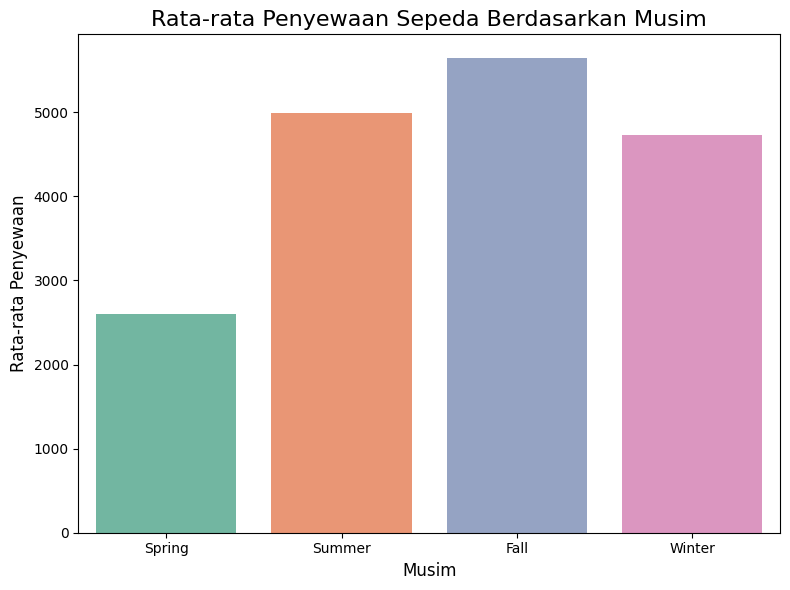

In [27]:
# Rata-rata penyewaan per musim
seasonal_data = day_df.groupby('season')['cnt'].mean().reset_index()

# Map season numbers to labels
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
seasonal_data['season_label'] = seasonal_data['season'].map(season_labels)

# Visualisasi pola musiman
plt.figure(figsize=(8, 6))
sns.barplot(data=seasonal_data, x='season_label', y='cnt', hue='season_label', palette='Set2', dodge=False)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim", fontsize=16)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Rata-rata Penyewaan", fontsize=12)
plt.legend([], [], frameon=False)  # Menghapus legend karena redundant
plt.tight_layout()
plt.show()


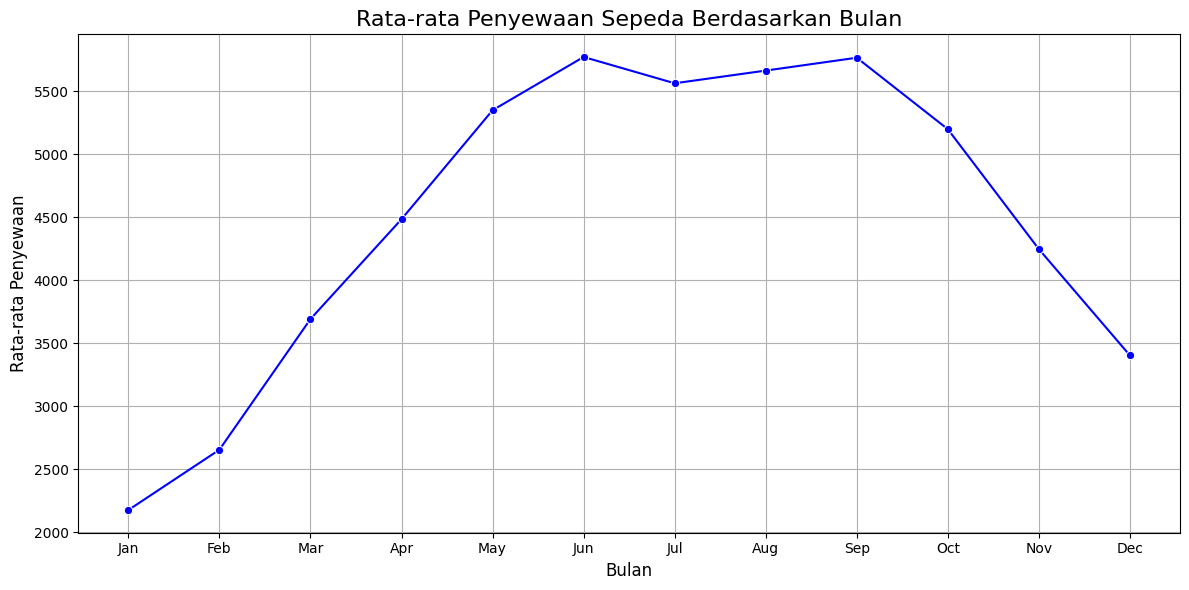

In [28]:
# Rata-rata penyewaan per bulan
monthly_data = day_df.groupby('mnth')['cnt'].mean().reset_index()

# Visualisasi pola bulanan
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x='mnth', y='cnt', marker="o", color="blue")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Bulan", fontsize=16)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Rata-rata Penyewaan", fontsize=12)
plt.xticks(range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.grid()
plt.tight_layout()
plt.show()


#Pertanyaan 2: Apakah terdapat tren peningkatan atau penurunan penyewaan dari tahun 2011 ke 2012?

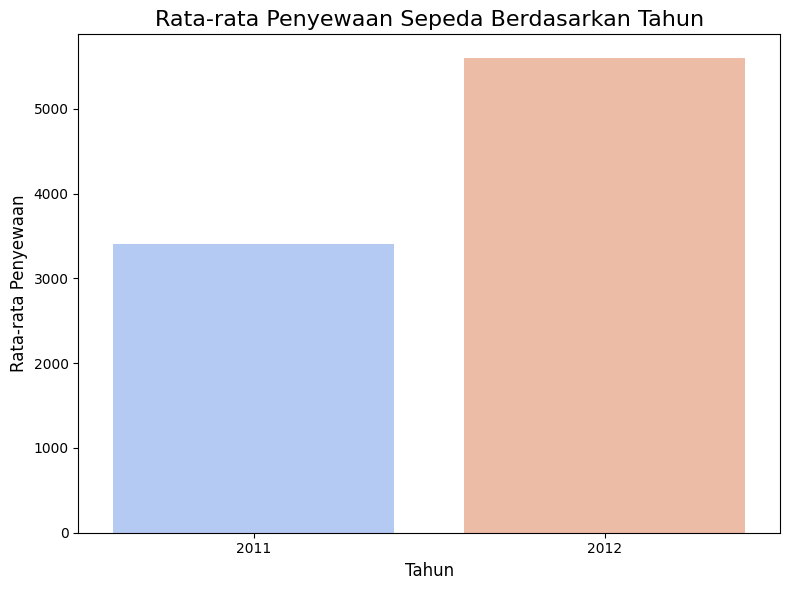

In [29]:
# Rata-rata penyewaan per tahun
yearly_data = day_df.groupby('yr')['cnt'].mean().reset_index()

# Map year numbers to labels
year_labels = {0: "2011", 1: "2012"}
yearly_data['yr_label'] = yearly_data['yr'].map(year_labels)

# Visualisasi pola tahunan
plt.figure(figsize=(8, 6))
sns.barplot(data=yearly_data, x='yr_label', y='cnt', hue='yr_label', palette='coolwarm', dodge=False)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Tahun", fontsize=16)
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Rata-rata Penyewaan", fontsize=12)
plt.legend([], [], frameon=False)  # Menghapus legend
plt.tight_layout()
plt.show()


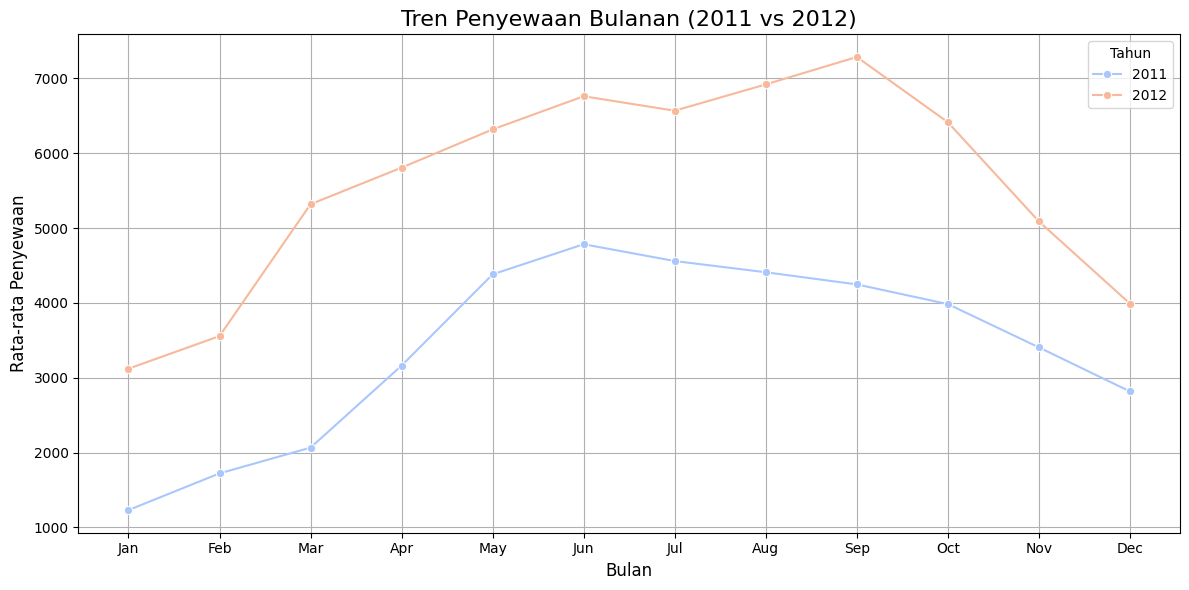

In [30]:
# Hitung rata-rata penyewaan per bulan berdasarkan tahun
monthly_yearly_data = day_df.groupby(['yr', 'mnth'])['cnt'].mean().reset_index()
monthly_yearly_data['yr_label'] = monthly_yearly_data['yr'].map({0: "2011", 1: "2012"})

# Visualisasi tren bulanan
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_yearly_data, x='mnth', y='cnt', hue='yr_label', marker="o", palette='coolwarm')
plt.title("Tren Penyewaan Bulanan (2011 vs 2012)", fontsize=16)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Rata-rata Penyewaan", fontsize=12)
plt.legend(title="Tahun")
plt.xticks(range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.grid()
plt.tight_layout()
plt.show()


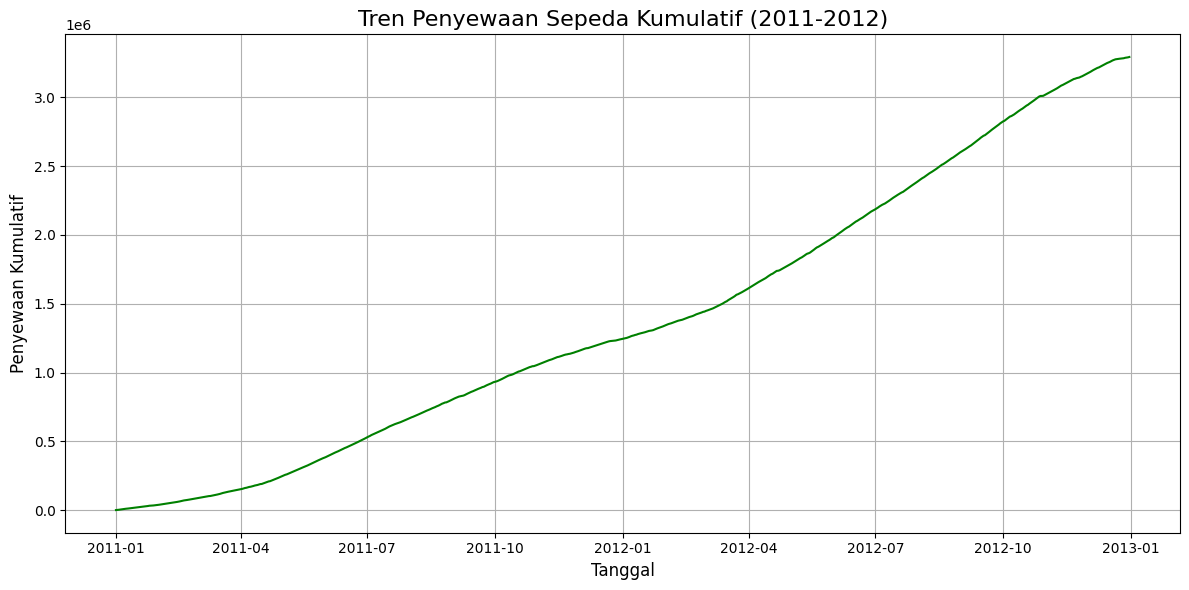

In [31]:
# Hitung penyewaan kumulatif
day_df['cumulative_cnt'] = day_df['cnt'].cumsum()

# Visualisasi tren kumulatif
plt.figure(figsize=(12, 6))
sns.lineplot(data=day_df, x='dteday', y='cumulative_cnt', color='green')
plt.title("Tren Penyewaan Sepeda Kumulatif (2011-2012)", fontsize=16)
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Penyewaan Kumulatif", fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()


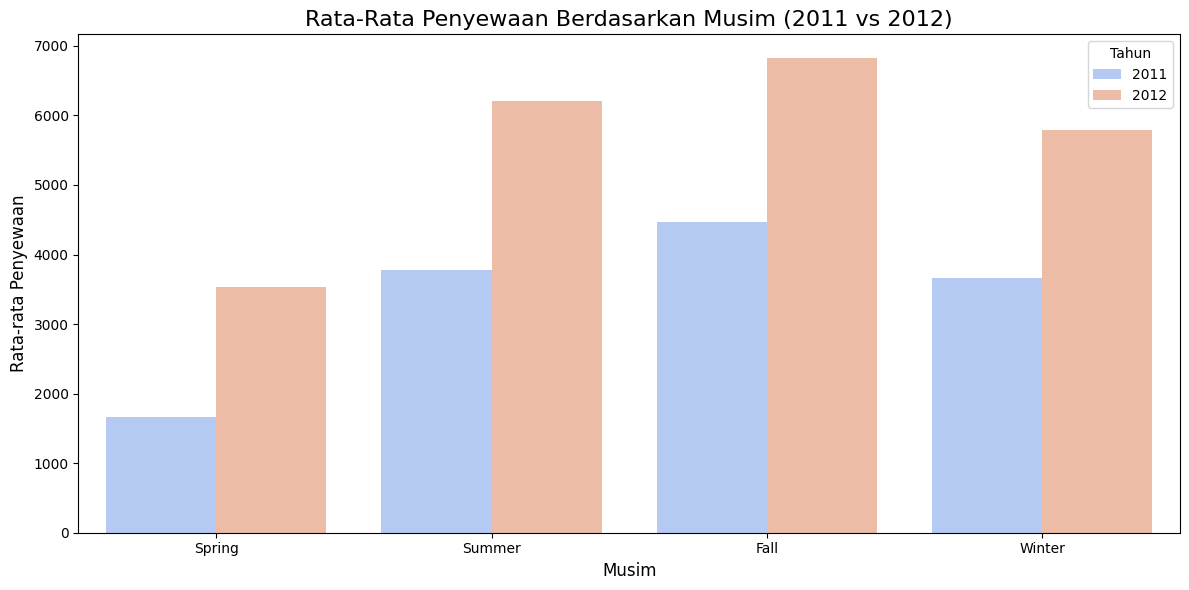

In [32]:
# Hitung rata-rata penyewaan per musim dan tahun
season_yearly_data = day_df.groupby(['yr', 'season'])['cnt'].mean().reset_index()
season_yearly_data['yr_label'] = season_yearly_data['yr'].map({0: "2011", 1: "2012"})
season_yearly_data['season_label'] = season_yearly_data['season'].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})

# Visualisasi rata-rata penyewaan per musim
plt.figure(figsize=(12, 6))
sns.barplot(data=season_yearly_data, x='season_label', y='cnt', hue='yr_label', palette='coolwarm')
plt.title("Rata-Rata Penyewaan Berdasarkan Musim (2011 vs 2012)", fontsize=16)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Rata-rata Penyewaan", fontsize=12)
plt.legend(title="Tahun")
plt.tight_layout()
plt.show()


**Insight:**



## Conclusion


1. **Apakah terdapat pola musiman dalam penyewaan sepeda?**
- Penyewaan sepeda mencapai puncaknya selama musim panas dan musim gugur, sementara musim dingin dan musim semi menunjukkan penyewaan terendah.
- Penyewaan bulanan memuncak pada bulan September dan turun tajam pada bulan-bulan musim dingin (Desember-Februari).
- Sistem penyewaan sepeda lebih populer pada cuaca hangat di musim panas dan musim gugur

2. **Apakah terdapat tren peningkatan atau penurunan penyewaan dari tahun 2011 ke 2012?**
- Ada tren peningkatan yang signifikan dalam jumlah penyewaan sepeda dari tahun 2011 ke 2012:
- Rata-rata penyewaan sepeda meningkat di semua musim pada tahun 2012 dibandingkan tahun 2011.
- Tren kumulatif juga menunjukkan peningkatan permintaan penyewaan sepeda secara konsisten selama dua tahun.
- Sistem penyewaan sepeda menjadi semakin populer, kemungkinan besar karena promosi yang lebih baik, perluasan layanan, atau meningkatnya kesadaran masyarakat akan transportasi ramah lingkungan.
